In [1]:
from qwak.qwak import QWAK
from utils.plotTools import searchProbStepsPlotting

import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp
import math
from qwak.State import State
from qwak.Operator import Operator
from qwak.QuantumWalk import QuantumWalk
from qwak.ProbabilityDistribution import ProbabilityDistribution
from qwak.qwak import QWAK
%matplotlib inline


In [3]:
def plotSearch(N,probT,tSpace,configVec):
    plotName = ""
    for T,walk,config,n in zip(tSpace,probT,configVec,N):
        #print(config)
        plt.plot(T,walk,color=config[0],linestyle=config[1],label="N=%s"%n)
        plt.vlines(max(T),0,1,color=config[0],linestyle=config[2])
        plt.legend()
        plt.xlabel("Number of steps")
        plt.ylabel("Probability of marked elements")
    for n in N:
        plotName+='_'+str(n)
    plt.savefig(r"C:\Users\jaime\Documents\GitHub\QWAK\Notebook\Output\\"+f"Search{plotName}")
    # plt.clf()
    
def plotSearch2(markedList, probT, tSpace, configVec,labels):
    plotName = ""
    fig = plt.figure()
    for T, walk, config, marked, label in zip(tSpace, probT, configVec, markedList,labels):
        plt.plot(T, walk, color=config[0], linestyle=config[1], label=label)
        plt.vlines(max(T), 0, max(probT[0]), color=config[0], linestyle=config[2])
        plt.legend()
        plt.xlabel("Number of steps")
        plt.ylabel("Probability of marked elements")
    for marked in markedList:
        plotName += '_' + str(len(marked))
    return fig
    
def taylor_series_approximation(n, num_terms):
    approx = 0
    for i in range(num_terms):
        approx += ((-1)**i) * (n**(-2*i-2)) / math.factorial(2*i+2)
    return approx

def taylor_series_approximation2(n, order):
    taylor_series = 0
    for i in range(order):
        taylor_series += (-1)**i * sp.binom(order, i) * (1/n)**(order - i)
    return taylor_series

def approx_1_over_n_squared(n,order):
    sum = 0
    for i in range(0, order):
        sum += 1 / (n ** (2+i))
    return sum

colors = ['r','b','g','k']
lines = ['-','-','-','-']
lines2 = ['--','--','--','--']
configVec = zip(colors,lines,lines2)


def init(N):
    psi0 = np.ones((N,1))/ np.sqrt(N)
    return psi0

def adjMatrix(N):
    adjM = np.ones((N,N),dtype='complex') - np.eye(N)
    return adjM


def hamiltonean(N,adjM,marked,gamma):
    H = -(gamma*adjM)
    H[marked][marked] = -1
    return H

def evo(H,t):
    U = expm(-1j*H*t)
    return U

def fin(N,evo):
    psiN = init(N)
    psiN = evo.dot(psiN)
    return psiN

def ampToProb(N,psiN,marked):
    prob = np.zeros((N,1))
    probMarked = np.zeros((N,1))
    for x in range(N):
        prob[x] += (np.absolute(psiN[x])**2)
        probMarked[x] += (np.absolute(psiN[marked])**2)
    return prob,probMarked

# Grover's Algorithm

In [4]:
def init(N):
    psi0 = np.ones((N,1))/ np.sqrt(N)
    return psi0

def oracle(N,marked):
    oracle = np.eye(N)
    for mark in marked:
        oracle[mark][mark] = -1
    return oracle

def diffusion(N):
    ketSuper = np.ones((N,1))/ np.sqrt(N)
    diff = 2 * np.outer(ketSuper,ketSuper) - np.eye(N)
    return diff

def unitary(N,marked):
    orac = oracle(N,marked)
    diff = diffusion(N)
    return np.dot(diff,orac)

def spaceGen(N):
    stepVec = []
    tVec = []
    for n in N:
        idealSteps = np.floor((np.pi/4)*np.sqrt(n))
        stepVec.append(int(idealSteps))
    return stepVec

def groverSimpleSearch(N,steps,marked):
    u = unitary(N,marked)
    prob = []
    psiN = init(N)
    for i in range(0,steps):
        psiN = np.dot(u,psiN)
    return np.absolute(psiN**2)

def groverSearch(N,stepSpace,marked):
    prob = []
    probT = []
    for n,steps in zip(N,stepSpace):
        u = unitary(n,marked)
        psiN=init(n)
        prob += [np.absolute(psiN[marked][0][0])**2]
        for step in range(1,steps+1):
            psiN = np.dot(u,psiN)
            prob+=[np.absolute(psiN[marked][0][0]**2)]
        probT.append(prob)
        prob = []
    return probT

## Single element Grover Search

In [5]:
# n=[200]
n=200
# steps = spaceGen(n)
steps = int(np.floor((np.pi/4) * np.sqrt(n)))
print(steps)
marked = [n//2]
# grover = groverSearch(n,steps,marked)[0]
groverSingleElement = groverSimpleSearch(n,steps,marked)

# plt.plot(groverSingleElement)

11


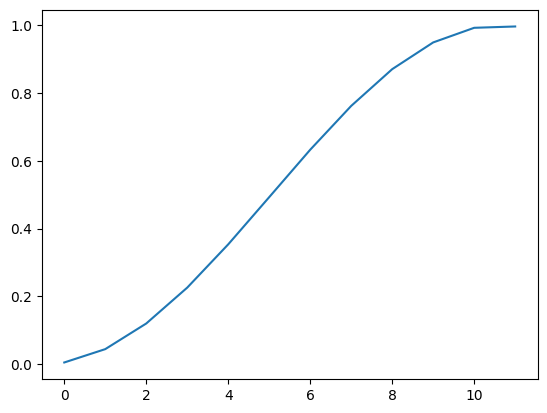

In [6]:
n=[200]
steps = spaceGen(n)
marked = [n[0]//2]
groverSingleElement2 = groverSearch(n,steps,marked)[0]
plt.plot(groverSingleElement2)

## Multiple element Grover Search

In [7]:
# n=[200]
n=200
# steps = spaceGen(n)
marked = [n//2-n//4,n//2,n//2+n//4]
steps = int(np.floor((np.pi/4) * np.sqrt(n/len(marked))))
print(steps)
# grover = groverSearch(n,steps,marked)[0]
groverMultipleElement = groverSimpleSearch(n,steps,marked)

# plt.plot(groverMultipleElement)

6


## Single Shot Grover Search

In [8]:
# n=[200]
n=200
# steps = spaceGen(n)
marked = [x for x in range(n//4,n//2)]
steps = int(np.floor((np.pi/4) * np.sqrt(n/len(marked))))
print(steps)
# grover = groverSearch(n,steps,marked)[0]
groverSingleShot = groverSimpleSearch(n,steps,marked)

# plt.plot(groverSingleShot)

1


# CTQW Search

## Single element CTQW Search

In [17]:
n=200
t = (np.pi/2) * np.sqrt(n)
# t=0
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

qw = QWAK(graph=graph,gamma=gamma,markedElements=[(n//2,-1)],laplacian=False)
qw.runWalk(time=t,initStateList=initCond)

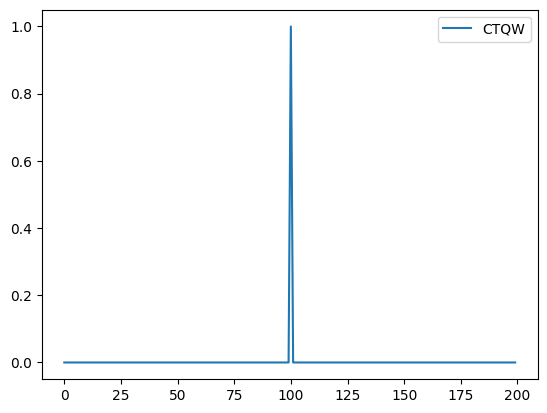

In [18]:
plt.plot(qw.getProbVec(),label='CTQW')
plt.legend()

# Multiple element Grover Search

In [21]:
n=200
markedSearch = [(n//4,-1),(n//2,-1),(n//2+n//4,-1)]
t = (np.pi/2) * np.sqrt(n/len(markedSearch))
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

qw = QWAK(graph=graph,gamma=gamma,markedElements=markedSearch,laplacian=True)
qw.runWalk(time=t,initStateList=initCond)
prob=0
for element in markedSearch:
    prob+= qw.getProbVec()[element[0]]

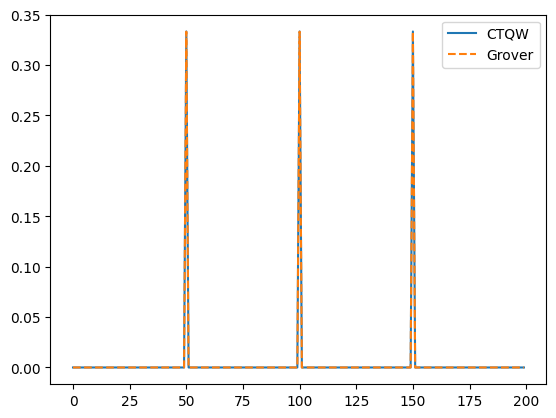

In [22]:
plt.plot(qw.getProbVec(),label='CTQW')
plt.plot(groverMultipleElement,label='Grover',linestyle='dashed')
plt.legend()

# Single Shot Grover

In [25]:
k = 6
n=  200
markedSearch = [(x,-1) for x in range(n//4,n//2)]

t = (np.pi/2) * np.sqrt(n/len(markedSearch))
print(t)
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

qw = QWAK(graph=graph,gamma=gamma,markedElements=markedSearch,laplacian=True)
qw.runWalk(time=t,initStateList=initCond)

3.141592653589793


# Other Experiments

## Probability vs number of steps as a function of #marked elements

In [26]:
n=200
markedSearch = [(x,-1) for x in range(1,n//16)]
t = (np.pi/2) * np.sqrt(n/len(markedSearch))

gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

timeList = [ x for x in np.linspace(0,t,50)]

qw = QWAK(graph=graph,gamma=gamma,markedElements=markedSearch,laplacian=True)
qw.runMultipleWalks(timeList=timeList,initStateList=initCond)
markedProbList = searchProbStepsPlotting(qw)

######

markedSearch2 = [(x,-1) for x in range(1,n//8)]

t = (np.pi/2) * np.sqrt(n/len(markedSearch2))
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

timeList2 = [ x for x in np.linspace(0,t,50)]

qw2 = QWAK(graph=graph,gamma=gamma,markedElements=markedSearch2,laplacian=True)
qw2.runMultipleWalks(timeList=timeList2,initStateList=initCond)
markedProbList2 = searchProbStepsPlotting(qw2)

########

markedSearch3 = [(x,-1) for x in range(1,n//4)]

t = (np.pi/2) * np.sqrt(n/len(markedSearch3))
gamma = 1/n
initCond = list(range(0,n))
graph = nx.complete_graph(n)

timeList3 = [ x for x in np.linspace(0,t,50)]

qw3 = QWAK(graph=graph,gamma=gamma,markedElements=markedSearch3,laplacian=True)
qw3.runMultipleWalks(timeList=timeList3,initStateList=initCond)
markedProbList3 = searchProbStepsPlotting(qw3)



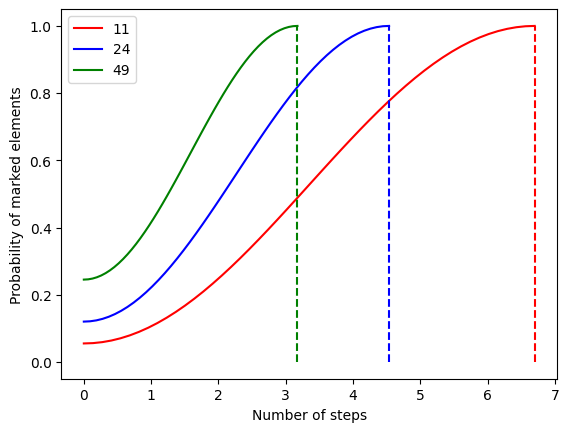

In [27]:
plotSearch2([markedSearch,markedSearch2,markedSearch3],[markedProbList,markedProbList2,markedProbList3],[timeList,timeList2,timeList3],configVec,labels = [f'{len(markedSearch)}',f'{len(markedSearch2)}',f'{len(markedSearch3)}'])
plt.show()

## Multiple single element searches

In [7]:
numberOfWalks = 4
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]

tList = [(np.pi/2) * np.sqrt(x) for x in nList]

gammaList = [1/x for x in nList]

markedSearchList =[[(x//2,-1)] for x in nList]


qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    qwakList.append(qw)


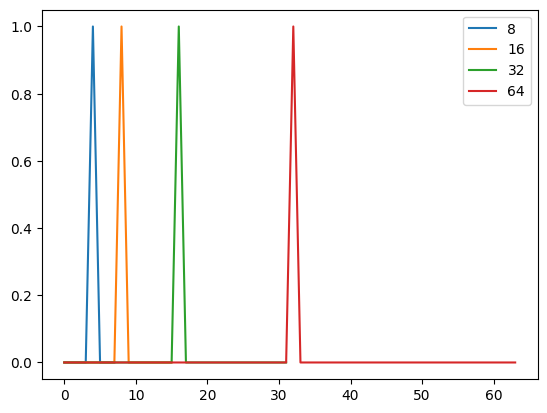

In [8]:
for qwak in qwakList:
    plt.plot(qwak.getProbVec(),label=f"{qwak.getDim()}")
plt.legend()

## Various multiple element searches

In [1]:
numberOfWalks = 5
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]


gammaList = [1/x for x in nList]

nMarkedElements = 3
markedSearchList =[[(x//2+k,-1) for k in range(0,nMarkedElements)] for x in nList]

tList = [(np.pi/2) * np.sqrt(x/nMarkedElements) for x in nList]

qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    qwakList.append(qw)


NameError: name 'np' is not defined

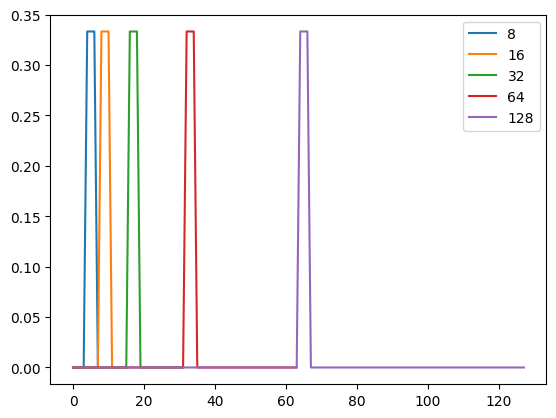

In [23]:
for qwak in qwakList:
    plt.plot(qwak.getProbVec(),label=f"{qwak.getDim()}")
    
plt.legend()

## Multiple Single Shot Grover searches

In [61]:
numberOfWalks = 5
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]


gammaList = [1/x for x in nList]

nMarkedElementsList = [x//4 for x in nList]
print(nMarkedElementsList)

markedSearchListAux = []
markedSearchList =[]
# markedSearchList =[[(x//4+k,-1) for k in range(y) ] for x,y in zip(nList,nMarkedElementsList)]
for x,n in zip(nMarkedElementsList,nList):
    for k in range(x):
        markedSearchListAux.append((n//4+k,-1))
        
    markedSearchList.append(markedSearchListAux)
    markedSearchListAux = []
    
print(len(markedSearchList))
tList = [(np.pi/2) * np.sqrt(x/len(y)) for x,y in zip(nList,markedSearchList)]

qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    print(f"qwakSize:{qw.getDim()}\t qwakTime:{qw.getTime()}")
    qwakList.append(qw)


[2, 4, 8, 16, 32]
5
qwakSize:8	 qwakTime:3.141592653589793
qwakSize:16	 qwakTime:3.141592653589793
qwakSize:32	 qwakTime:3.141592653589793
qwakSize:64	 qwakTime:3.141592653589793
qwakSize:128	 qwakTime:3.141592653589793


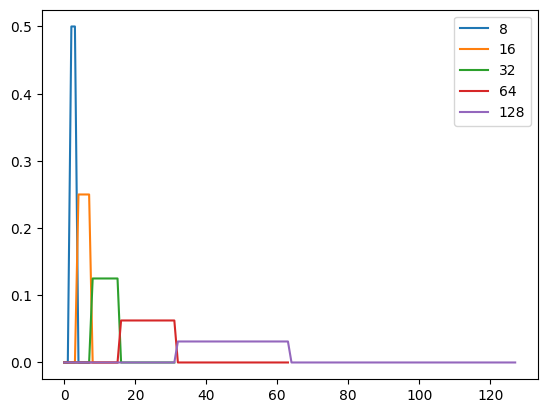

In [ ]:
for qwak in qwakList:
    plt.plot(qwak.getProbVec(),label=f"{qwak.getDim()}")
    
plt.legend()

## Searching in a Hypercube

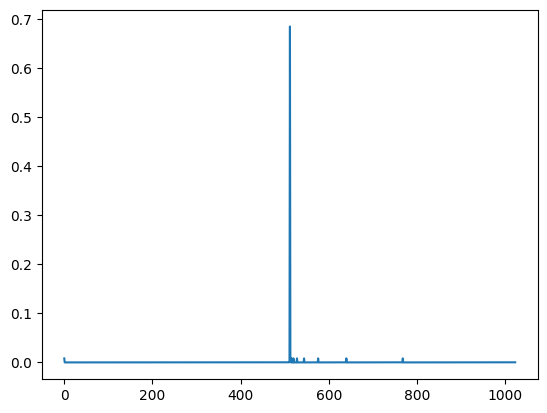

In [4]:
n=10
graph = nx.hypercube_graph(n)
gamma = 1/n + approx_1_over_n_squared(n,20)# Gamma do paper do renato https://arxiv.org/pdf/2212.08889.pdf

N = len(graph)
markedElements = [(N//2,-1)]

t = np.floor(np.pi/2 * sqrt(N)) 
initCond = list(range(0,len(graph)))


qw = QWAK(graph=graph,gamma=gamma,markedElements=markedElements,laplacian=False)
qw.runExpmWalk(time=t,gamma=gamma,initStateList=initCond)
plt.plot(qw.getProbVec())

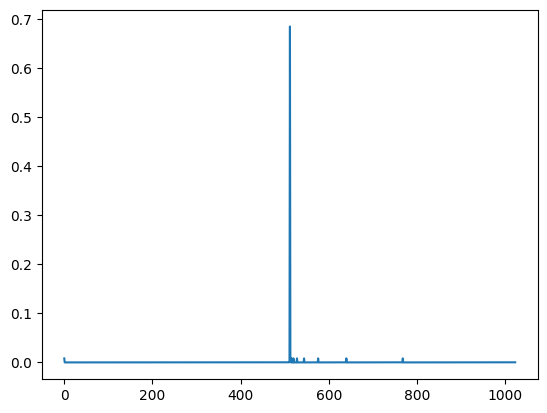

In [5]:
n=10
graph = nx.hypercube_graph(n)
gamma = 1/n + approx_1_over_n_squared(n,20)# Gamma do paper do renato https://arxiv.org/pdf/2212.08889.pdf

N = len(graph)
markedElements = [(N//2,-1)]

t = np.floor(np.pi/2 * sqrt(N))
initCond = list(range(0,len(graph))) 


qw = QWAK(graph=graph,gamma=gamma,markedElements=markedElements,laplacian=False)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
plt.plot(qw.getProbVec())

In [27]:
n=10
graph = nx.hypercube_graph(n)
gamma = 1/n + approx_1_over_n_squared(n,20)# Gamma do paper do renato https://arxiv.org/pdf/2212.08889.pdf

N = len(graph)
markedSearch = [(N//2,-1)]
initCond = list(range(0,len(graph)))

qw = QWAK(graph=graph,gamma=gamma,markedElements=markedSearch,laplacian=False)


In [28]:
timeList = np.linspace(0, (np.pi/(2) * np.sqrt(N)),20)
qwList = []

qw.runMultipleWalks(timeList = timeList,initStateList=initCond)
markedProbList = searchProbStepsPlotting(qw)


plotSearch2([markedSearch],[markedProbList],[timeList],configVec,['QWAK'])

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [26]:
n=10
graph = nx.hypercube_graph(n)
gamma = 1/n + approx_1_over_n_squared(n,20)# Gamma do paper do renato https://arxiv.org/pdf/2212.08889.pdf

N = len(graph)
initCond = list(range(0,len(graph)))


timeList = np.linspace(0, (np.pi/(2) * np.sqrt(N)),5)
gammaList = np.linspace(0, 1/n + approx_1_over_n_squared(n,20) ,10)
markedProbList = []
markedSearch = []
timeListList = []
labelList = []

for gamma in gammaList:
    qw = QWAK(graph=graph,gamma=gamma,markedElements=[(N//2,-1)],laplacian=False)
    qw.runMultipleWalks(timeList = timeList,initStateList=initCond)
    markedProbList.append(searchProbStepsPlotting(qw))
    markedSearch.append( [(N//2,-1)])
    timeListList.append( timeList)
    labelList.append([f'gamma = {gamma}'])
    qw.resetWalk()


poltS = plotSearch2(markedSearch,markedProbList,timeListList,configVec,labelList)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [22]:
print(gamma)


0.11111111111111112


In [33]:
n = 10
gamma = 0 
for k in range(1,n+1):
    gamma += ( math.factorial(n) / (math.factorial(k)*math.factorial(n-k)) ) * 1/k
    print(k)
gamma = gamma * (1/(2**n))
print(gamma)
    

1
2
3
4
5
6
7
8
9
10
0.22888571118551587
